In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [36]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data']],
                     columns= iris['feature_names'])
df.head()
df2 = pd.DataFrame()
#we want to predict petal width

In [37]:
df3 = df[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)']]
df[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)']] = StandardScaler().fit_transform(df[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)']])

In [38]:
list(df)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
df["sepal_both"] = df["sepal length (cm)"] * df["sepal width (cm)"]
df["petal_length_sq"] = df["petal length (cm)"] ** 2
df = df.drop("sepal_petal",axis=1)

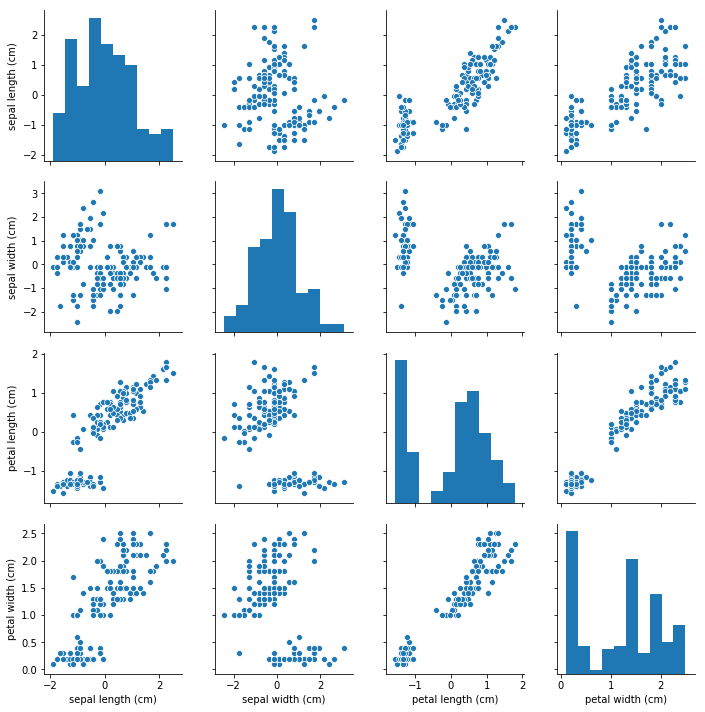

In [39]:
sns.pairplot(df)

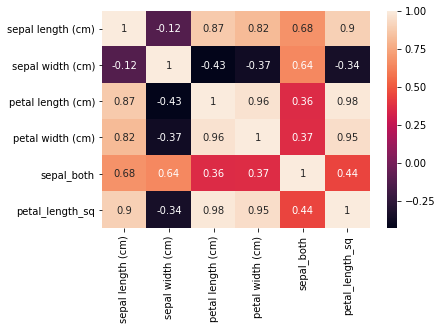

In [27]:
sns.heatmap(df.corr(), annot=True)

In [103]:
list(df)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson',
 'PopulationSq',
 'Murder']

In [139]:
#feature engineering
#from the last assignment, we put together the features population, population squared, murder (binary), burglary(binary  )
#I ended up dropping the one hots and added more from the dataset. We were able to explain all of the variance which was a
# little bit scary since that usually leads to overfitting. However, our holdout group looked good as well.

#linear regression
#df["Property\ncrime"] = df["Property\ncrime"].str.replace(",","") 

from sklearn import linear_model
regr = linear_model.LinearRegression()
Y = df["Property\ncrime"].values.reshape(-1, 1)

X = df[["Population", "PopulationSq", "Arson", "Robbery", "Motor\nvehicle\ntheft", "Burglary", "Larceny-\ntheft"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

print(regr.fit(X_train, y_train).score(X_test, y_test))

print(regr.fit(X, Y).score(X, Y))


1.0
1.0


In [95]:

#create some new interactions
df["Violent\ncrime"] = df["Violent\ncrime"].str.replace(",", "")
df["ViolentCrime_Robbery"] = pd.to_numeric(df["Violent\ncrime"])* pd.to_numeric(df["Robbery"])

ValueError: Unable to parse string "1,322" at position 35

### 2nd model

In [179]:
df2 = pd.read_csv("CA_2013.csv")

In [180]:
df2.drop('Rape\n(revised\ndefinition)1', axis=1, inplace=True)
df2.drop('Unnamed: 13', axis=1, inplace=True)
df2 = df2.dropna()

In [181]:
#convert from str to int
df2["Population"] = pd.to_numeric(df2["Population"].str.replace(",", ""))
#df2["Population"]
#df2["PopulationSq"] = np.square(pd.to_numeric(df2["Population"]))
df2["PopulationSq"] = df2["Population"] ** 2
df2["Aggravated\nassault"] = pd.to_numeric(df2["Aggravated\nassault"].str.replace(",", ""))
df2["Burglary"] = pd.to_numeric(df2["Burglary"].str.replace(",", ""))
df2["Larceny-\ntheft"] = pd.to_numeric(df2["Larceny-\ntheft"].str.replace(",", ""))
df2["Property\ncrime"] = df2["Property\ncrime"].str.replace(",", "")
df2["Property\ncrime"] = pd.to_numeric(df2["Property\ncrime"])
df2["Violent\ncrime"] = pd.to_numeric(df2["Violent\ncrime"].str.replace(",", ""))
#df2["ViolentCrime_Robbery"] = df2["Violent\ncrime"]* df2["Robbery"]
df2["Motor\nvehicle\ntheft"] = pd.to_numeric(df2["Motor\nvehicle\ntheft"].str.replace(",", ""))
df2["Robbery"] = pd.to_numeric(df2["Robbery"].str.replace(",", ""))
df2["Arson"] = pd.to_numeric(df2["Arson"].str.replace(",", ""))

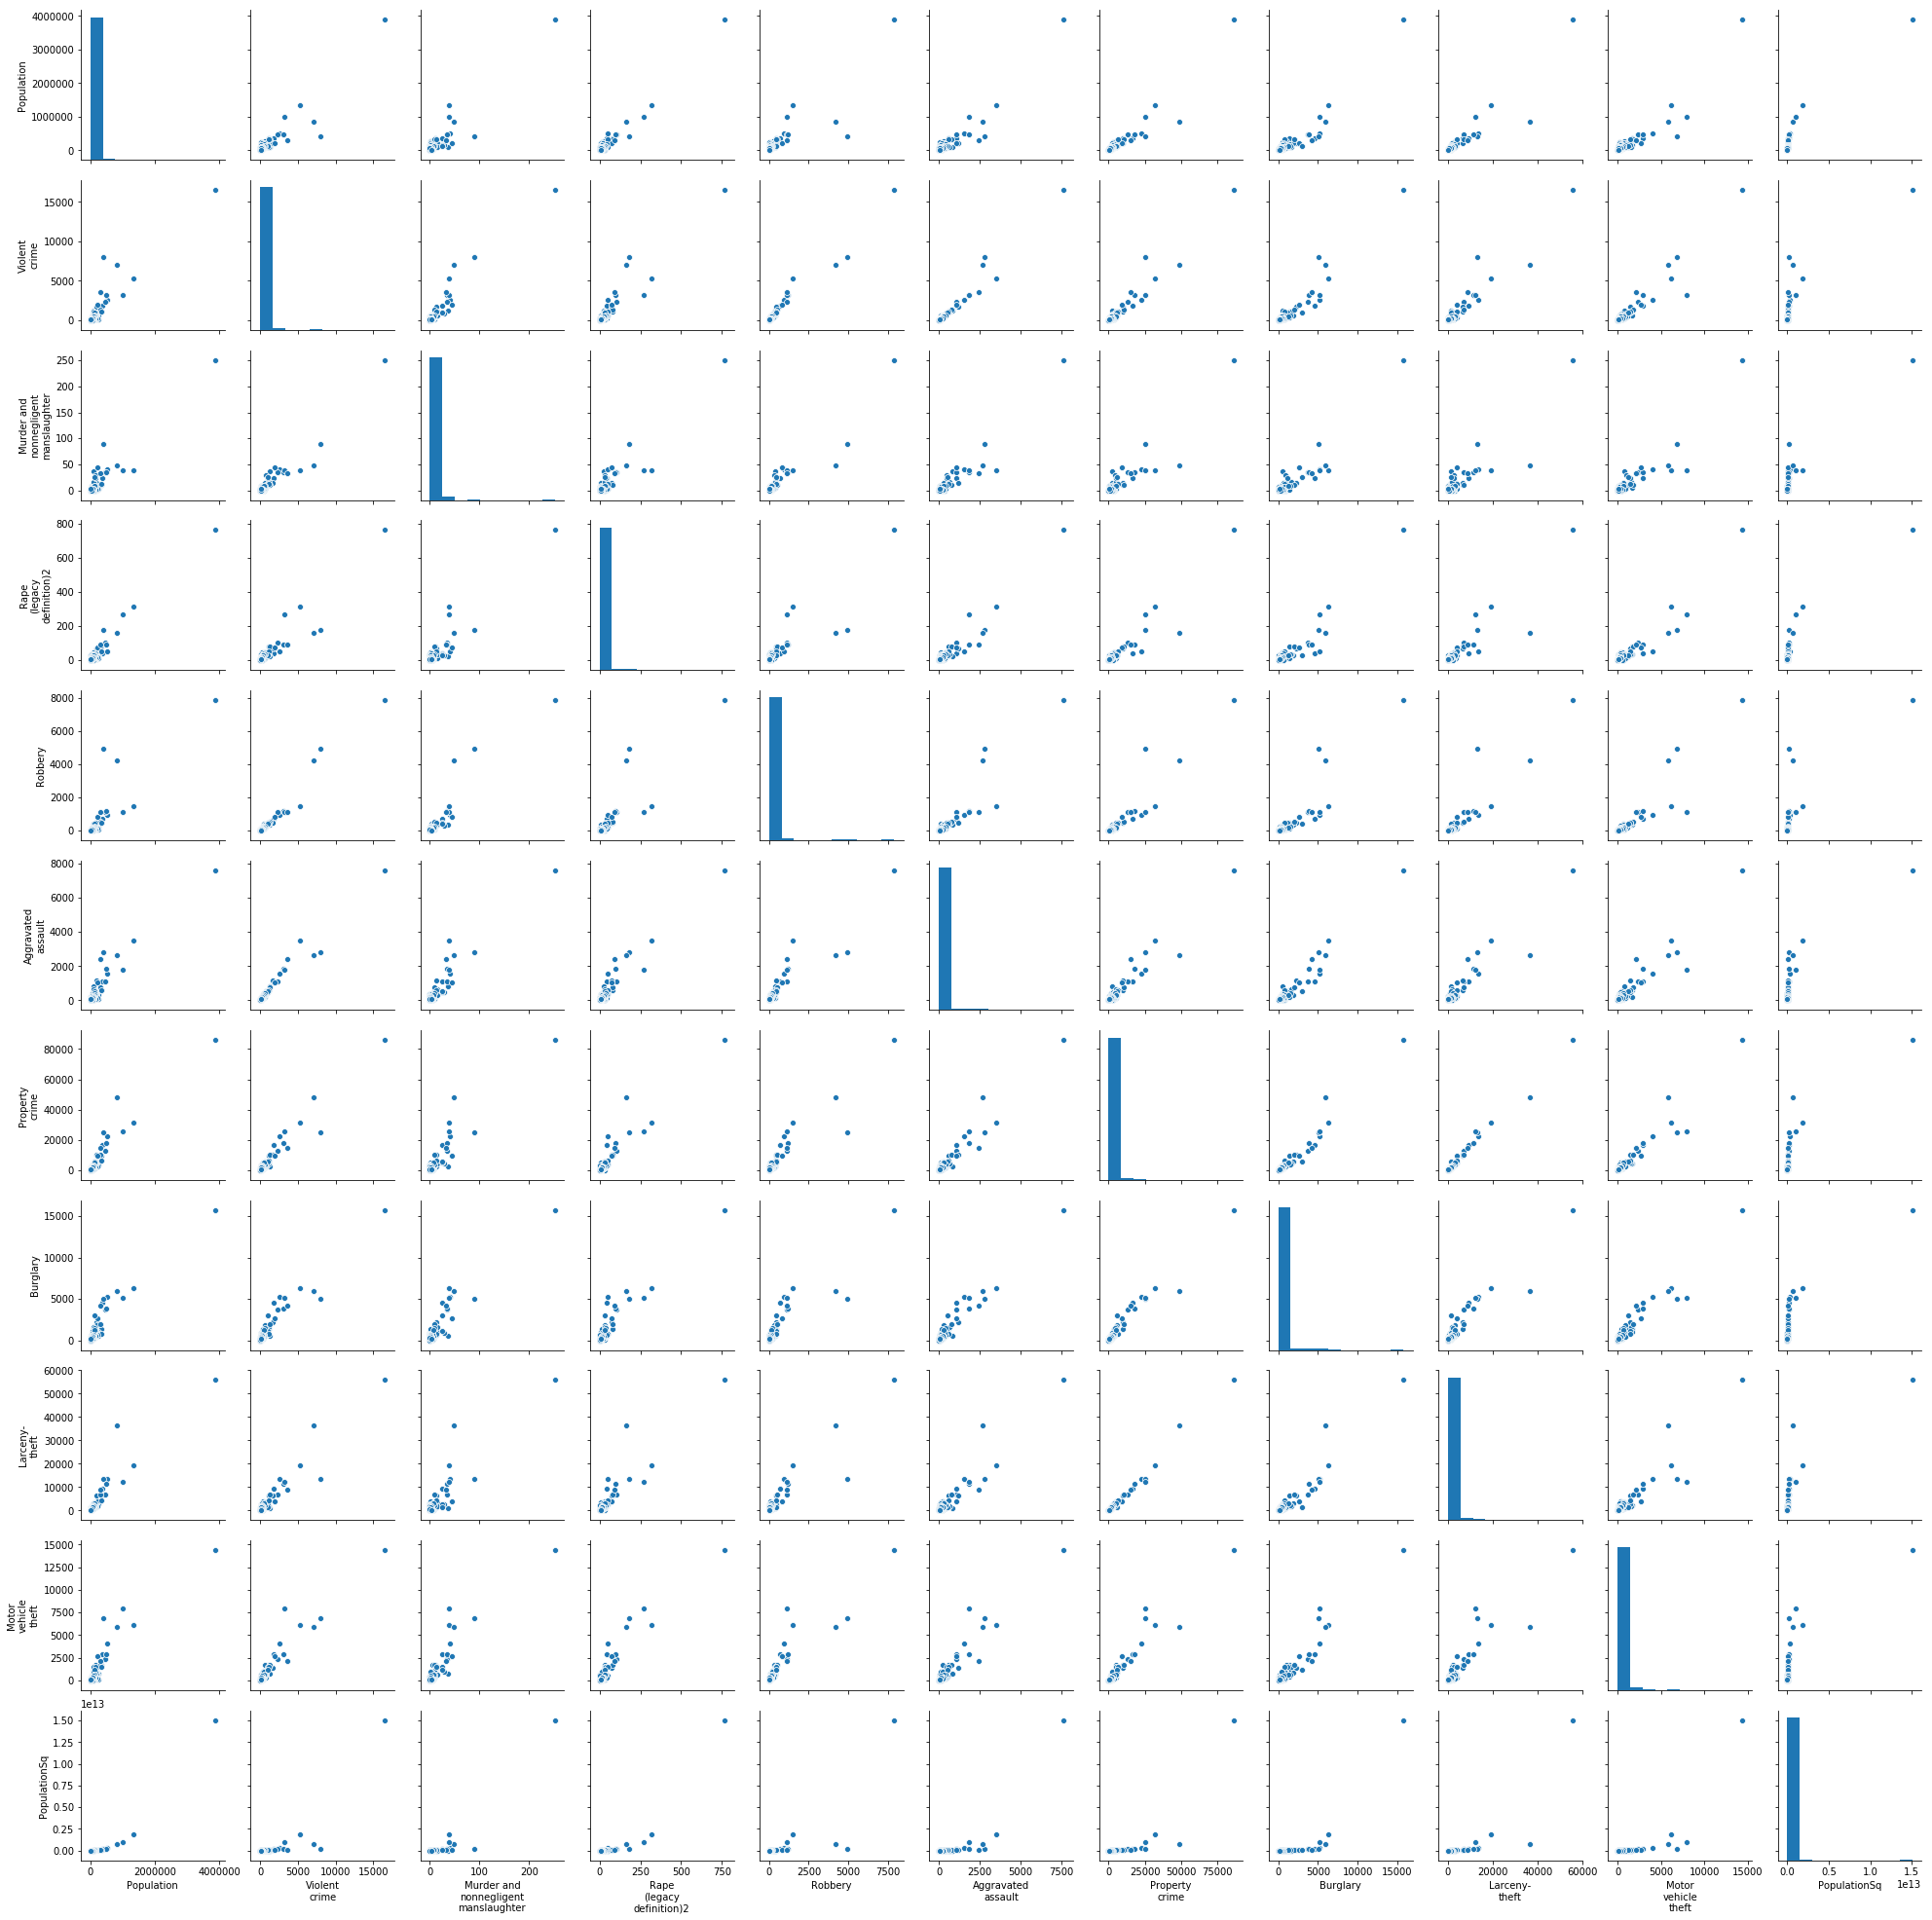

In [178]:
#df2 = df2.fillna(0)
sns.pairplot(df2)

In [189]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
Y = df2["Property\ncrime"]

X = df2[["Population", "PopulationSq", "Arson", "Robbery", "Motor\nvehicle\ntheft", "Burglary", "Larceny-\ntheft"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.2)

print(regr.fit(X_train, y_train).score(X_test, y_test))

print(regr.fit(X, Y).score(X, Y))
len(X)
#len(Y)

1.0
1.0


462

In [183]:
#the 2013 CA dataset received the same result.
#Because CA has some high numbers, i had to remember to convert some of the columns that I didn't have to in the NY one. 
#such as Robbery and Arson

In [184]:
len(df)

187

In [185]:
len(df2)

462